In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Data Visualization and Scope

### 1. The first part of the discussion will be centered on [this video](https://tinyurl.com/data100-rosling)

   Answer the following questions about the quality of the visualization in the video.

   #### (a) How are the variables being represented visually?
   
   As a scatter plot.
   
   #### (b) How do we interpret the visual qualities?  In other words, how can we look at the image and know how to interpret the properties of the plot into data?

A mark represents a country, it's area is proportional to the population and the color represents the continent.
The x and y coordinates are proportional to the country's income and lifespan, respectively.
All these variables are quantitative.

#### (c) Does it look like the raw values of the data were plotted or were they (numerically) transformed before plotting?
   
   Yes, the x axis is the log of the income.
   
#### (d) Is there any information present that is not represented visually?
   
   Pass of time visually represented as an animation, as the video advances (occasionally, as an annotation, too).

   #### (e) Write down your thoughts on the granularity, faithfulness, temporality, and scope of this data set.
   
   Granularity: each data point represents a whole country, very coarse. This was highlighted by the presenter with Shanghai, well ahead of the chinese average.  
   Faithfulness: it is very likely that it is variable, more reliable for developed democracies.  
   Temporality: the data spans multiple decades.  
   Scope: is there an association between income and lifespan? The data seems to cover this.  
   
   #### Questions you would want to ask Rosling about the data
   Is income PPP adjusted?  
   How was the data obtained?  
   Where is the original dataset?  
   What would it look like the granularity was smaller, regions or cites instead of whole nations?  
   Would it be possible to see lifespan vs. other variables?  
   Is there any relation between urbanisation (health care is nearer) and lifespan?
   

### 2.  Name  and  sketch  some  appropriate  ~~printed  (on  paper~~)  2D  visualizations  if  your  goal  is  to explore:

   #### (a)  The distribution of a single categorical variable (e.g., political party preference of voters).
   
   

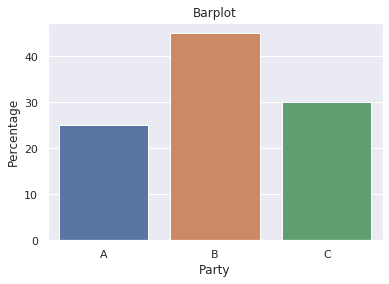

In [72]:
parties = pd.DataFrame({'Party': ['A', 'B', 'C'], 'Percentage': [25, 45, 30]})
sns.barplot(data=parties, x='Party', y='Percentage')
plt.title("Barplot");

   #### (b)  The distribution of a single continuous variable (e.g., income).
   
   

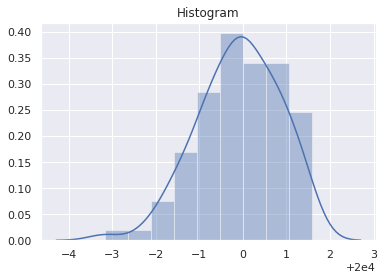

In [82]:
sns.distplot(20000 + np.random.randn(100));
plt.title("Histogram");

   #### (c)  The relationship between two continuous variables (e.g., income vs. weight).
   
   

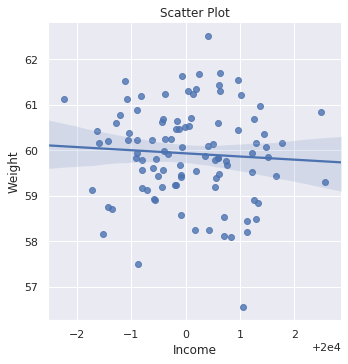

In [33]:
continous2 = pd.DataFrame({'Income': 20000 + np.random.randn(100), 
                           'Weight': 60 + np.random.randn(100)})
sns.lmplot(data=continous2, x='Income', y='Weight');
plt.title('Scatter Plot');

   #### (d)  The relationship between a discrete and a continuous variable.
   
   

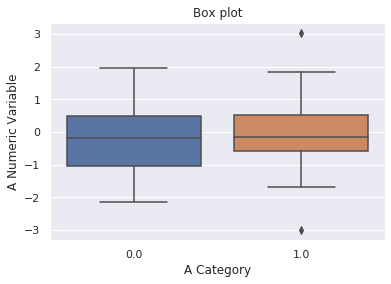

In [80]:
discont = pd.DataFrame({'A Category': np.concatenate([np.zeros(40), np.ones(60)]),
                        'A Numeric Variable': np.random.randn(100)})
sns.boxplot(data=discont, x='A Category', y='A Numeric Variable')
plt.title("Box plot");

   #### (e)  The relationship between two continuous variables and two discrete variables (e.g., income vs. weight by race and city).
   
   

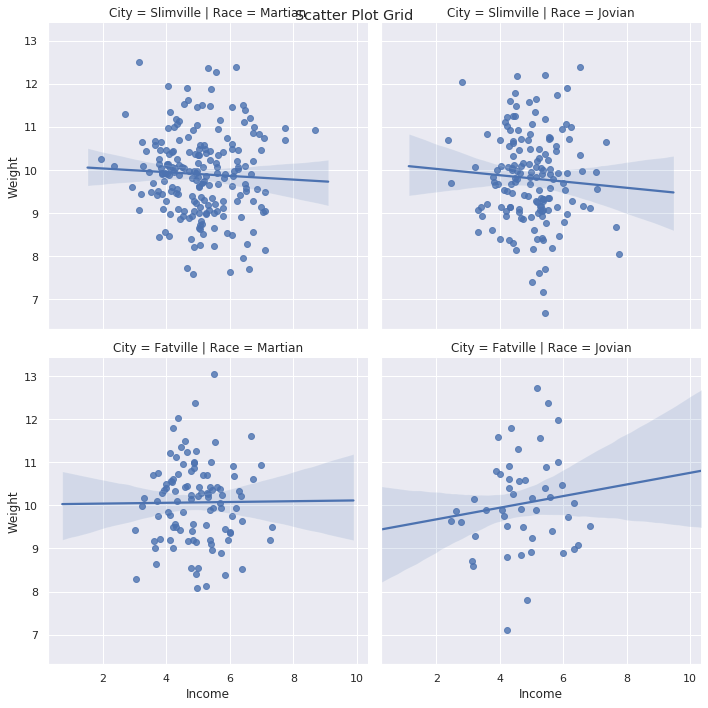

In [70]:
dis2cont2 = pd.DataFrame({
    'Income': 5 + np.random.randn(500),
    'Weight': 10 + np.random.randn(500), 
    'Race': np.random.permutation((('Martian '*300)+('Jovian '*200)).split()),
    'City': np.random.permutation((('Slimville '*350)+('Fatville '*150)).split())
})
sns.lmplot(data=dis2cont2, x='Income', y='Weight', col='Race', row='City');
plt.suptitle('Scatter Plot Grid');

### 3.  Discuss the problems with keeping the visualizations below as they are.  Color versions are given in the document found on the course website. You may want to think about:

   - What could the plot be trying to communicate?  
   - What visual qualities distract from the message?  
   - If there is a comparison between different variables, how easy is it to compare relevant values?  
     
   

   ---
   ![alt text](calories.JPG "Title")

   - #### What could the plot be trying to communicate?  
   How unhealthy are different kinds of fast food.
   
   - #### What visual qualities distract from the message?  
   The colorcode sidebox (and colors) is redundant given that categories are already labeled in the x axis.  
   The shading and texture are not distracting but unnecessary.
   Bars don't comunicate anything, dots would be less distracting.
   - #### If there is a comparison between different variables, how easy is it to compare relevant values?    
   A box plot would be better, given that we are comparing one categorical and one numeric variable.  
   It would also be more realistic if typical servings were compared, rather than 100 gr.
     
     
     
     

   ---
   ![alt text](pigmeat.JPG "Title")

   - #### What could the plot be trying to communicate?  
   Relative popularity of different pork meat products.  
   - #### What visual qualities distract from the message?  
   Too many colors, like in the title and in the background.  
   3D doesn't add anything to 2D, there is only one variable  (categorical).  
   - #### If there is a comparison between different variables, how easy is it to compare relevant values? 
   Pie charts are notorious, we are bad at comparing angles, bars or dots would have been better.  
   

---
   ![alt text](patient.JPG "Title")

   - #### What could the plot be trying to communicate?  
   It is hard to tell, but something to do with how three diffent patient numerical health variables evolved over time.  
   - #### What visual qualities distract from the message?  
   3D doesn't add anything and makes comparisons harder.  
   Decimals not needed in the y axis for what seems like an integer variable.  
   Plot line colors are too similar shades of blue to tell appart.  
   - #### If there is a comparison between different variables, how easy is it to compare relevant values? 
   A line plot is suitable to compare how different numerical variables evolve over time, no problem here.  
   

   ---
   ![alt text](antibacon.JPG "Title")

   - #### What could the plot be trying to communicate?
   Degree of support for anti-bacon agenda over USA (by county?).
   - #### What visual qualities distract from the message? 
   Color grade variation is not proportional to variable value, makes it very hard to understand how support varies.  
   The granularity is really small, and also varies from east to west, maybe by state would have been easier to understand.
   - #### If there is a comparison between different variables, how easy is it to compare relevant values? 
   There is a comparison between a geographical categorical variable (county?) and a numerical variable (support).
   The idea of using a map is great, but marred by the issues above.

## Logarithmic Transformations

### 4.  One of your friends at a biology lab asks you to help them analyze `panTHERIA`, a database of mammals.  They are interested in the relationship between mass, measured in grams, and metabolic rate (“energy expenditure”),  measured by oxygen use per hour.   Originally,  they show you the data on a linear (absolute) scale, shown on the left. You notice that the values on both axes vary over a large range with many data points clustered around the smaller values, so you suggest that they instead plot the data on a log-log scale, shown on the right. The solid red line is a “line of best fit” (we’ll formalize this later in the course) while the black dashed line represents the identity line $y=x$.

   ![alt text](pic2.JPG)


#### (a)  Let $C$ and $k$ be some constants and $x$ and $y$ represent mass and metabolic rate, respectively.  Based on the plots, which of the following best describe the pattern seen in the data? 
   
  - A. $y = C + kx$  
  - B. $y = C10^{kx}$  
  - C. $y = C + klog_{10}(x)$  
  - D. $y = Cx^k$
  
  It is D:
    
  $
      log y = k{log x} + D
      =>
      e^{log y} = e^{k{log x}+D}
      =>
      y = e^{D}e^{k{log x}}
      =>
      y = {C}e^{log x^k}
      =>
      y = Cx^k
  $

#### (b)  What parts of the plots could you use to make initial guesses on $C$ and $k$?

Take two points in the log log plot to guess the slope ($k$) and the intercept ($log C$)

#### (c)  Your friend points to the solid line on the log-log plot and says “since this line is going up and to the right, we can say that, in general, the bigger a mammal is, the greater its metabolic rate”. Is this a reasonable interpretation of the plot?

Yes, given that the log of a variable grows with the variable. The log log plot shows that there is a positive association.

#### (d)  They go on to say “since the slope of this line is less than 1,  we see that,  in general, mammals with greater mass tend to spend less energy per gram than their smaller counterparts”. Is this a reasonable interpretation of the plot?

No, the slope only shows the correlation, to what degree the two variables are linearly related.

### 5.  When making visualizations, what are some reasons for performing log transformations on the data?

The main reason is when there there is skew.